<a href="https://colab.research.google.com/github/Emilyjane994/Development-of-Novel-MLfor-predicting-TCR-peptide-MHC-binding-/blob/main/description_of_databases_iprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
np.random.seed(621)
import re #	For performing more advanced string operations
import plotly.graph_objects as go #	For creating interactive graphs
import math #	For performing math operations
import scipy.stats as stat #For performing statistical operations
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
from math import log10
from scipy.stats import median_test

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/iPREP Biodesign project

/content/gdrive/MyDrive/iPREP Biodesign project


In [ ]:
mcpas = pd.read_csv('McPAS_final3.csv', encoding='latin', low_memory=False)
mcpas

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC.class,MHC,HLA.aa,Antigen,Antigen.Molecule,Antigen.Source,Host,Protein.ID,Category,Pathology.Mesh.ID,Antigen.identification.method,Epitope.ID,Tissue,Reference
0,CAVTKGLTGGGNKLTF,TRAV8-4,TRAJ10,CASSGRDRQNTEAFF,TRBV19,TRBJ1-1,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239
1,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-1,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239
2,CAVSGYSTLTF,TRAV12-2,TRAJ11,CASSAQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239
3,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239
4,CAGGDSTLTF,TRAV12-2,TRAJ11,CASSQEGTSRPQHF,TRBV3-1,TRBJ1-5,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,CIVRAYNAGNN,TRAV4,TRAJ38,CASSPTGQAHEQYF,TRBV18,TRBJ2-7,HLA-II,HLA-DPB1*02:01,PENYLFQGRQECYAFNGTQRFLERYIYNREEFVRFDSDVGEFRAVT...,FWIDLFETIG,Beryllium sulfate,Allergy,Human,NaN,Allergy,D001607,1.0,229215.0,Lung,24719461
727,CAVVNMDSNYQLIWGAGTKL,TRAV39,TRAJ33,CASSLATSGGGSDTQYF,TRBV5-1,TRBJ2-3,HLA-II,HLA-DRB1*04:01,PENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVT...,KRGIVEQSSTSISSL,insulin precursor A1-15,Diabetes Type 1,Human,NaN,Autoimmune,D003939,2.1,103223.0,Pancreatic Islets,15889096
728,CAVGALAGTASKLTF,TRAV8-3,TRAJ44,CSVEATRADTQYF,TRBV29-1,TRBJ2-3,HLA-II,HLA-DRB1*04:01,PENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVT...,KRGIVEQCCTSISSL,insulin precursor A1-15,Diabetes Type 1,Human,NaN,Autoimmune,D003939,2.1,103223.0,Pancreatic Islets,15889096
729,CIPGSEEYGNKLVFGAGTIL,TRAV26-2,TRAJ47,CASSLATSGGGSDTQYF,TRBV5-1,TRBJ2-3,HLA-II,HLA-DRB1*04:01,PENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVT...,KRGIVEQSSTSISSL,insulin precursor A1-15,Diabetes Type 1,Human,NaN,Autoimmune,D003940,2.1,103223.0,Pancreatic Islets,15889096


In [ ]:
def describe_mcpas(df):
    print('Human Samples: ', len(df[df['Host'] == 'Human']))
    print('Unique Antigen Sequences: ', len(df['Antigen'].unique()))
    print('Cancer Based Samples: ', len(df[df['Category'] == 'Cancer']))
    print('MHC I Samples: ', len(df[df['MHC'].str.match('^HLA-[ABC]')==True]))
    print('MHC II Sample: ', len(df[df['MHC'].str.match('^(HLA-D|DR|D)')==True]))
    print('TCR-Epitope Pairs Available: ', len(df))

# McPAS TCR Beta Sequences
mcpas_beta_pairs = mcpas.loc[(mcpas['CDR3B'].notnull()) & (mcpas['Antigen'].notnull())]
print('McPAS TCR Beta Sequences')
print('Unique CDR3 Beta Sequences: ', len(mcpas_beta_pairs['CDR3B'].unique()))
describe_mcpas(mcpas_beta_pairs)

# McPAS TCR Alpha Sequences
mcpas_alpha_pairs = mcpas.loc[(mcpas['CDR3A'].notnull()) & (mcpas['Antigen'].notnull())]
print('\nMcPAS TCR Alpha Sequences')
print('Unique CDR3 Alpha Sequences: ', len(mcpas_alpha_pairs['CDR3A'].unique()))
describe_mcpas(mcpas_alpha_pairs)

# McPAS TCR Alpha AND Beta Sequences
mcpas_both_pairs = mcpas.loc[(mcpas['CDR3A'].notnull()) & (mcpas['Antigen'].notnull()) & (mcpas['CDR3B'].notnull())]
print('\nMcPAS TCR Both Beta and Alpha Available')
describe_mcpas(mcpas_both_pairs)

McPAS TCR Beta Sequences
Unique CDR3 Beta Sequences:  525
Human Samples:  731
Unique Antigen Sequences:  14
Cancer Based Samples:  4
MHC I Samples:  725
MHC II Sample:  6
TCR-Epitope Pairs Available:  731

McPAS TCR Alpha Sequences
Unique CDR3 Alpha Sequences:  501
Human Samples:  731
Unique Antigen Sequences:  14
Cancer Based Samples:  4
MHC I Samples:  725
MHC II Sample:  6
TCR-Epitope Pairs Available:  731

McPAS TCR Both Beta and Alpha Available
Human Samples:  731
Unique Antigen Sequences:  14
Cancer Based Samples:  4
MHC I Samples:  725
MHC II Sample:  6
TCR-Epitope Pairs Available:  731


In [ ]:
vdjdb = pd.read_csv('VDJdb_final4.csv', encoding='latin')
vdjdb

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC.class,MHC,HLA.aa,Antigen,Antigen.Molecule,Antigen.Source,Host,Reference
0,CAASLKTSYDKVIF,TRAV23/DV6,TRAJ50-1,CAISEGAPNTEAFF,TRBV10-3,TRBJ1-1,HLA-I,HLA-A*01:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKME...,FGDHPGHSY,PTPRN,Homo Sapiens,Homo Sapiens,PMID:34811538
1,CAVDNFNKFYF,TRAV21-1,TRAJ21-1,CASSSQGGYGYTF,TRBV7-3,TRBJ1-2,HLA-I,HLA-A*01:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKME...,KVDPIGHVY,MAGEA6,Homo Sapiens,Homo Sapiens,PMID:26901407
2,CAAIGGSTLGRLYF,TRAV29/DV5,TRAJ18-1,CASSPIKDTRQEYTGELFF,TRBV28-1,TRBJ2-2,HLA-I,HLA-A*01:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKME...,FTSDYYQLY,ORF3,SARS-CoV-2,Homo Sapiens,PMID:34793243
3,CAVGDGNNRLAF,TRAV8-3,TRAJ7-1,CASSLGTASTDTQYF,TRBV27-1,TRBJ2-3,HLA-I,HLA-A*01:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKME...,PTDNYITTY,NSP3,SARS-CoV-2,Homo Sapiens,PMID:34793243
4,CASSFSSNSYEQYF,TRAV12-1,TRAJ24-1,CVVRADSWGKLQF,TRBV28-1,TRBJ2-7,HLA-I,HLA-A*01:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKME...,PTDNYITTY,NSP3,SARS-CoV-2,Homo Sapiens,PMID:34793243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,CAASGNTGTASKLTF,TRAV29/DV5,TRAJ44-1,CASSNQLVTGGYGYTF,TRBV19-2,TRBJ1-2,HLA-II,HLA-DRA*01:01,IKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVD\nMAKKETVWR...,MTEYKLVVVGARGVGKSALTIQLI,KRAS,Homo Sapiens,Homo Sapiens,PMID:34168045
952,CAENSGGSNYKLTF,TRAV13-2,TRAJ53-1,CASSWERAGKAFF,TRBV5-4,TRBJ1-1,HLA-II,HLA-DRA*01:01,IKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVD\nMAKKETVWR...,VVVGAVGVGKSALTIQLIQN,KRAS,Homo Sapiens,Homo Sapiens,PMID:36512410
953,CAVSRAGAGSYQLTF,TRAV2-1,TRAJ28-1,CSARAGGGEAKNIQYF,TRBV20-1,TRBJ2-4,HLA-II,HLA-DRA*01:01,IKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLE...,AAVVRFQEAANKQKQ,Rv3874,M.tuberculosis,Homo Sapiens,PMID:28636589
954,CAVRDPGNTDKLIF,TRAV1-2,TRAJ34-1,CSARASGGEAKNIQYF,TRBV20-1,TRBJ2-4,HLA-II,HLA-DRA*01:01,IKEEHVIIQAEFYLNPDQSGEFMFDFDGDEIFHVDMAKKETVWRLE...,AAVVRFQEAANKQKQ,Rv3874,M.tuberculosis,Homo Sapiens,PMID:28636589


In [ ]:
def describe_vdjdb(df):
    print('Human Samples: ', len(df[df['Host'] == 'HomoSapiens']))
    print('Unique Antigen Sequences: ', len(df['Antigen'].unique()))
    print('MHC I Samples: ', len(df[df['MHC'].str.match('^HLA-[ABC]')==True]))
    print('MHC II Sample: ', len(df[df['MHC'].str.match('^(HLA-D|DR|D)')==True]))
    print('Total Pairs: ', len(df))


# vdjdb TCR Beta Sequences
vdjdb_beta_pairs = vdjdb.loc[(vdjdb['CDR3B'].notnull()) & (vdjdb['Antigen'].notnull())]
print('vdjdb TCR Beta Sequences')
print('Unique CDR3 Beta Sequences: ', len(vdjdb_beta_pairs['CDR3B'].unique()))
describe_vdjdb(vdjdb_beta_pairs)

# vdjdb TCR Alpha Sequences
vdjdb_alpha_pairs = vdjdb.loc[(vdjdb['CDR3A'].notnull()) & (vdjdb['Antigen'].notnull())]
print('\nvdjdb TCR Alpha Sequences')
print('Unique CDR3 Alpha Sequences: ', len(vdjdb_alpha_pairs['CDR3A'].unique()))
describe_vdjdb(vdjdb_alpha_pairs)

# vdjdb TCR Alpha AND Beta Sequences
vdjdb_both_pairs = vdjdb.loc[(vdjdb['CDR3A'].notnull()) & (vdjdb['Antigen'].notnull()) & (vdjdb['CDR3B'].notnull())]
print('\nvdjdb TCR Both Beta and Alpha Available')
describe_vdjdb(vdjdb_both_pairs)

vdjdb TCR Beta Sequences
Unique CDR3 Beta Sequences:  781
Human Samples:  0
Unique Antigen Sequences:  305
MHC I Samples:  784
MHC II Sample:  164
Total Pairs:  956

vdjdb TCR Alpha Sequences
Unique CDR3 Alpha Sequences:  764
Human Samples:  0
Unique Antigen Sequences:  305
MHC I Samples:  784
MHC II Sample:  164
Total Pairs:  956

vdjdb TCR Both Beta and Alpha Available
Human Samples:  0
Unique Antigen Sequences:  305
MHC I Samples:  784
MHC II Sample:  164
Total Pairs:  956


In [ ]:
IEDB = pd.read_csv('IEDBfull_NAremoved7.csv', encoding='latin', low_memory=False)
IEDB

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC.class,MHC,HLA.aa,Antigen,Antigen.Molecule,Antigen.Source,Host
0,AAMEGAQKLV,TRAV29/DV5,TRAJ54-1,ASSYPGGGFYEQY,TRBJ2-7,TRBV6-5,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLFGYPVYV,transcriptional activator Tax,Human T-cell leukemia virus type I (Human T ce...,Homo Sapiens
1,GFGNEKI,TRAV6-5,TRAJ48,SARGSNTEV,TRBV1,TRBJ1-1,HLA-II,HLA-DRB1*04:01,TRPRFLEQVKHECHFFNGTERVRFLDRYFYHQEEYVRFDSDVGEYR...,GGYRARPAKAAAT,Fibrinogen beta chain,Homo Sapiens,Homo Sapiens
2,LVGDKDDKII,TRAV4,TRAJ3,ASSAQREGEQF,TRBV1,TRBJ2-1,HLA-II,HLA-DQA1*05:01,IVADHVASYGVNLYQSYGPSGQYTHEFDGDEQFYVDLGRKETVWCL...,PQPQLPYPQPQ,alpha-gliadin,Triticum aestivum (Canadian hard winter wheat),Homo Sapiens
3,AVDIETSGSRLT,TRAV27,TRAJ58,ASSELGGAGTGEL,TRBV1,TRBJ2-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,NLVPMVATV,pp65,Human herpesvirus 5 (Human cytomegalovirus),Homo Sapiens
4,RGGGYKV,TRAV6-6,TRAJ12,SADGRGDAETL,TRBV1,TRBJ2-3,HLA-II,HLA-DRB1*04:01,TRPRFLEQVKHECHFFNGTERVRFLDRYFYHQEEYVRFDSDVGEYR...,GGYRARPAKAAAT,Fibrinogen beta chain,Homo Sapiens,Homo Sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,CAARFDSGYALNF,TRAV29/DV5,TRAJ4-1,CASSTYSGQSYGYTF,TRBV9-2,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,BMLF1 protein,Human herpesvirus 4 (Epstein Barr virus),Homo Sapiens
8181,CAARFDSGYALNF,TRAV29/DV5,TRAJ4-1,CASSTYYGQSYGYTF,TRBV9-2,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,BMLF1 protein,Human herpesvirus 4 (Epstein Barr virus),Homo Sapiens
8182,CLVGRDGGSYlPTF,TRAV4-1,TRAJ6-1,CASSAGQGAYEQYF,TRBV9-2,TRBJ2-7,HLA-I,HLA-B*07:02,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,RPIPIKYKAM,NaN,NaN,Homo Sapiens
8183,CLVGRDGGSYlPTF,TRAV4-1,TRAJ6-1,CASSAGQGAYEQYF,TRBV9-2,TRBJ2-7,HLA-I,HLA-B*07:02,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,KRPIPIKYKAM,NaN,NaN,Homo Sapiens


#IEDB statistics

In [ ]:
def describe_IEDB(IEDB):
    print('Human Samples: ', len(IEDB[IEDB['Host'] == 'Homo sapiens (human)']))
    print('Unique Antigen Sequences: ', len(IEDB['Antigen'].unique()))
    print('MHC I Samples: ', len(IEDB[IEDB['MHC'].str.match('^HLA-[ABC]')==True]))
    print('MHC II Sample: ', len(IEDB[IEDB['MHC'].str.match('^(HLA-D|DR|D)')==True]))
    print('Total Pairs: ', len(IEDB))


def filter_alpha(IEDB):
    filtered_data = IEDB.loc[IEDB['CDR3A'].notnull()]
    return filtered_data

def filter_beta(IEDB):
    filtered_data = IEDB.loc[IEDB['CDR3B'].notnull()]
    return filtered_data

def filter_both_alpha_beta(IEDB):
    filtered_data = IEDB.loc[IEDB['CDR3A'].notnull() & IEDB['CDR3B'].notnull()]
    return filtered_data


# IEDB TCR Alpha AND Beta Sequences
IEDB_both_pairs = IEDB.loc[(IEDB['CDR3A'].notnull()) & (IEDB['Antigen'].notnull()) & (IEDB['CDR3B'].notnull())]
print('\nIEDB TCR Both Beta and Alpha Available')
describe_IEDB(IEDB_both_pairs)


IEDB TCR Both Beta and Alpha Available
Human Samples:  0
Unique Antigen Sequences:  1021
MHC I Samples:  6247
MHC II Sample:  1934
Total Pairs:  8185


#Combine the datasets

Conditions:


*   alpha Beta paired Sequences Only
*   MHC I and II
*   VDJDB Conditions
*   VDJDB Score > 1
*   McPAS Conditions
*   Remove McPAS sequences with '*'
*   IEDB Conditions
*   Remove IEDB Sequences with '+', '*', or '#'
*   Remove IEDB Non Amino Acid Epitopes (beryllium atom)



In [ ]:
# Function to filter and process the dataframe
def final_filter_combined(df):
    # Epitope sequences of length 17 or lower
    df = df.loc[df['Antigen'].str.len() <= 17]
    # Positively Binding pairs
    df = df.assign(Affinity=1)
    return df

# Combine the datasets together and drop duplicates
full_combined_sequences = pd.concat([mcpas, vdjdb, IEDB])
combined_sequences = final_filter_combined(full_combined_sequences)
combined_sequences = combined_sequences.drop_duplicates(['Antigen', 'CDR3A', 'CDR3B', 'TRAV', 'TRAJ', 'TRBV', 'TRBJ'], keep='last')
combined_sequences = combined_sequences.reset_index(drop=True)
len(combined_sequences['Antigen'].unique())

1220

In [ ]:

print(combined_sequences.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CDR3A                          9704 non-null   object 
 1   TRAV                           9704 non-null   object 
 2   TRAJ                           9704 non-null   object 
 3   CDR3B                          9704 non-null   object 
 4   TRBV                           9704 non-null   object 
 5   TRBJ                           9704 non-null   object 
 6   MHC.class                      9704 non-null   object 
 7   MHC                            9704 non-null   object 
 8   HLA.aa                         9704 non-null   object 
 9   Antigen                        9704 non-null   object 
 10  Antigen.Molecule               9451 non-null   object 
 11  Antigen.Source                 9463 non-null   object 
 12  Host                           9704 non-null   o

In [ ]:
combined_sequences.head(10)

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC.class,MHC,HLA.aa,Antigen,Antigen.Molecule,Antigen.Source,Host,Protein.ID,Category,Pathology.Mesh.ID,Antigen.identification.method,Epitope.ID,Tissue,Reference,Affinity
0,CAVTKGLTGGGNKLTF,TRAV8-4,TRAJ10,CASSGRDRQNTEAFF,TRBV19,TRBJ1-1,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
1,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-1,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
2,CAVSGYSTLTF,TRAV12-2,TRAJ11,CASSAQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
3,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
4,CAGGDSTLTF,TRAV12-2,TRAJ11,CASSQEGTSRPQHF,TRBV3-1,TRBJ1-5,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
5,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYEQYF,TRBV6-1,TRBJ2-7,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
6,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYEQYF,TRBV6-2,TRBJ2-7,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
7,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYEQYF,TRBV6-3,TRBJ2-7,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
8,CVVSVGVLYSTLTF,TRAV8-2,TRAJ11,CASSSGRTEHNEQFF,TRBV11-2,TRBJ2-1,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
9,CVVFKAAGNKLTF,TRAV10-1,TRAJ1-1,CASGGSSYQETQYF,TRBV1-1,TRBJ2-5,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,BMLF-1,Epstein Barr virus (EBV),Human,Q04360,Pathogens,D020031,1.0,20788.0,PBMC,28636592,1


#Determine Overlap Between Datasets

In [ ]:
def determine_overlap(df1, df2):
    """
    Determines the rows which are both in df1 and df2
    """
    df1_sequences_only = df1[['Antigen', 'CDR3A', 'CDR3B', 'TRAV', 'TRAJ', 'TRBV', 'TRBJ',"MHC"]]
    df1_sequences_only = df1_sequences_only.drop_duplicates()
    df2_sequences_only = df2[['Antigen', 'CDR3A', 'CDR3B', 'TRAV', 'TRAJ', 'TRBV', 'TRBJ',"MHC"]]
    df2_sequences_only = df2_sequences_only.drop_duplicates()
    df = pd.merge(df1_sequences_only, df2_sequences_only, how='inner', on=['Antigen', 'CDR3A', 'CDR3B', 'TRAV', 'TRAJ', 'TRBV', 'TRBJ',"MHC"])
    return df

def print_overlap_statistic(name, overlap_df, original_df):
    overlap_stat = len(overlap_df)/len(original_df) * 100
    print(f'{name} overlap with IEDB:  {len(overlap_df)}/{len(original_df)} ({str(round(overlap_stat, 2))}%)')

overlap_mcpas = determine_overlap(mcpas,IEDB)
overlap_vdjdb = determine_overlap(vdjdb, IEDB)
overlap = determine_overlap(vdjdb, mcpas)

overlap_mcpas_stat = len(overlap_mcpas)/len(mcpas) * 100
overlap_vdjdb_stat = len(overlap_vdjdb)/len(vdjdb) * 100
overlap_stat = len(overlap)/len(mcpas) * 100
print_overlap_statistic('McPAS', overlap_mcpas, mcpas)
print_overlap_statistic('vdjdb', overlap_vdjdb, vdjdb)
print_overlap_statistic('overlap', overlap, mcpas)


McPAS overlap with IEDB:  19/731 (2.6%)
vdjdb overlap with IEDB:  26/956 (2.72%)
overlap overlap with IEDB:  0/731 (0.0%)


In [ ]:
def combined_summary_stats(df):
    print('Unique Antigen Sequences: ', len(df['Antigen'].unique()))
    print('Unique TRAV Sequences: ', len(df['TRAV'].unique()))
    print('Unique TRAJ Sequences: ', len(df['TRAJ'].unique()))
    print('Unique TRBV Sequences: ', len(df['TRBV'].unique()))
    print('Unique TRBJ Sequences: ', len(df['TRBJ'].unique()))
    print('Unique CDR3A Sequences: ', len(df['CDR3A'].unique()))
    print('Unique CDR3B Sequences: ', len(df['CDR3B'].unique()))
    print('MHC Class I: ', len(df[df['MHC.class'] == 'HLA-I']))
    print('MHC Class II: ', len(df[df['MHC.class'] == 'HLA-II']))
    print('VDJDB Pairs: ', len(vdjdb))
    print('McPAS Pairs: ', len(mcpas))
    print('IEDB Pairs: ', len(IEDB))
    print('Total Pairs: ', len(df))

print('Combined VDJDB and McPAS Statistics')
combined_summary_stats(combined_sequences)

Combined VDJDB and McPAS Statistics
Unique Antigen Sequences:  1220
Unique TRAV Sequences:  101
Unique TRAJ Sequences:  114
Unique TRBV Sequences:  91
Unique TRBJ Sequences:  17
Unique CDR3A Sequences:  6870
Unique CDR3B Sequences:  7598
MHC Class I:  7659
MHC Class II:  2045
VDJDB Pairs:  956
McPAS Pairs:  731
IEDB Pairs:  8185
Total Pairs:  9704


In [ ]:
import re
import pandas as pd

def check_CDR3A_pattern(CDR3A_values):
    pattern = r'^C.*F$'
    non_matching_values = [val for val in CDR3A_values if not re.match(pattern, val)]

    if not non_matching_values:
        return "All sequences match"

    return non_matching_values

# Assuming 'combined_sequences' is your DataFrame and 'CDR3A' is the column of interest
CDR3A_column_values = combined_sequences['CDR3A'].tolist()

# Call the function to get non-matching values or "All sequences match" if they all match
result = check_CDR3A_pattern(CDR3A_column_values)

print("Non-matching values in CDR3A column:")
print(result)



Non-matching values in CDR3A column:
['CATDAPSNYQLIW', 'CAVRDSNYQLIW', 'CAVRDSNYQLIW', 'CAVNIDNMDSNYQLIW', 'CAVNIDTMDSNYQLIW', 'CAMREVMDSNYQLIW', 'CAFSSNYQLIW', 'CAFSSNYQLIW', 'CAASDSNYQLIW', 'CAVRQDYQLIW', 'CAVRQGYQLIW', 'CLVGSMDSNYQLIW', 'CAVDDLYSNYQLIW', 'CAVDDLYSNYQLIW', 'CAVGNYQLIW', 'CATDRWDSNYQLIW', 'CATDRWDSNYQLIW', 'CAGPLDSNYQLIW', 'CAASARSMDSNYQLIW', 'CVGNSE', 'CAASARSMDSNYQLIW', 'CAMQDSNYQLIW', 'CAVSGGYQKVT', 'CAGSGGYQKVT', 'CAESGGYQKVT', 'CAMSGGYQKVT', 'CAESGGYQKTV', 'CAGSGGYQKVT', 'CALSGGYQKVT', 'CAASGGYQKVT', 'CAESGGYQKVT', 'CAESTGYQKVT', 'CAMRESVSGYNKLI', 'CAESTGNQFY', 'CASPDAGGTSYGKLT', 'CIVRVWDAGNN', 'CIVRAYNAGNN', 'CAVVNMDSNYQLIWGAGTKL', 'CIPGSEEYGNKLVFGAGTIL', 'CADAGGTSYKLFGQGTIL', 'CAILMDSNYQLIW', 'CAMREGGNYQLIW', 'CAVRNMDSNYQLIW', 'CALSEAGMDSNYQLIW', 'CALSEAGMDSNYQLIW', 'CALSEAGMDSNYQLIW', 'CALSEAGMDSNYQLIW', 'CALSEAGMDSNYQLIW', 'CVVSIAGNNRKLIW', 'CIVRPRWDSNYQLIW', 'CAARPDSNYQLIW', 'CAVLDSNYQLIW', 'CAVRDSNYQLIW', 'CAVSDARNYQLIW', 'CAVRERNAGNNRKLIW', 'CAGVLDSNYQLIW'

In [ ]:
import re
import pandas as pd

def check_CDR3B_pattern(CDR3B_values):
    pattern = r'^C.*F$'
    non_matching_values = [val for val in CDR3B_values if not re.match(pattern, val)]

    if not non_matching_values:
        return "All sequences match"

    return non_matching_values

# Assuming 'combined_sequences' is your DataFrame and 'CDR3A' is the column of interest
CDR3B_column_values = combined_sequences['CDR3B'].tolist()

# Call the function to get non-matching values or "All sequences match" if they all match
result = check_CDR3B_pattern(CDR3B_column_values)

print("Non-matching values in CDR3B column:")
print(result)

Non-matching values in CDR3B column:
['CASSGQGGYT', 'CASSGQSYGYA', 'SSGNQFYF', 'ASSYPGGGFYEQY', 'SARGSNTEV', 'ASSAQREGEQF', 'ASSELGGAGTGEL', 'SADGRGDAETL', 'SGDWGSAETL', 'SADNNQDTQ', 'ASGPQREGEQY', 'ASSESVSTEAF', 'ASSESPGYGYT', 'ASSDVLSPYGYT', 'ASSDKFAGNPQPQH', 'ASSTGTVSYEQY', 'ASSRDRYNSPLH', 'ASSERVAGGSTGELF', 'ASSGGTSGAYEQY', 'CASRDATGGFEQYV', 'AISGEDRGNTEAF', 'AISQEDRGNTEAF', 'AISEVLTGAYGYT', 'AISGDYLKELF', 'AIDPTGSLNQPQH', 'AIKWSQDNSPLH', 'AIKWSQDNSPLH', 'AISESPSGALGQF', 'AISDLAGEPKTQETQY', 'GGTRTESSYEQ', 'ASSGSLTGTGGAEAF', 'ASSSLTSGILGEQF', 'ASSFRPRGVNEQF', 'ASSPSLGTTINIQY', 'ASSLAQAPAGETQY', 'ASSLFRETEAF', 'CASSLGQGLLYGYT', 'CASSLGQGLLYGYT', 'CASSLGQGLLYGYT', 'CASSLGQGLLYGYT', 'CASSLGQGLLYGYT', 'CASSLGQGLLYGYT', 'CASSLQSLLDEKLFFG', 'ASSLRGRGDQPQH', 'ASSLRGRGDQPQH', 'ASSLRGRGDQPQH', 'ASSLRGRGDQPQH', 'ASSSATQGNIH', 'ASSSGRTEHNEQF', 'CASSADSNGELFFG', 'SPWMSSTDTQ', 'ASSFRHGETQY', 'ATSLQGEAAETQY', 'ATSLQGEAAETQY', 'ASSLQGESQETQY', 'ASSSTAQETQY', 'ASSLGGMAIRETQY', 'ASNTGTDSYEQY', 'ASAP

In [ ]:
# Remove entries with 'X' in the CDR3A column
combined_sequences = combined_sequences[~combined_sequences['CDR3A'].str.contains('X')]
combined_sequences = combined_sequences[~combined_sequences['CDR3B'].str.contains('X')]
combined_sequences = combined_sequences[~combined_sequences['HLA.aa'].str.contains('X')]
combined_sequences = combined_sequences[~combined_sequences['Antigen'].str.contains('X')]
combined_sequences

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC.class,MHC,HLA.aa,Antigen,Antigen.Molecule,Antigen.Source,Host,Protein.ID,Category,Pathology.Mesh.ID,Antigen.identification.method,Epitope.ID,Tissue,Reference,Affinity
0,CAVTKGLTGGGNKLTF,TRAV8-4,TRAJ10,CASSGRDRQNTEAFF,TRBV19,TRBJ1-1,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
1,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-1,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
2,CAVSGYSTLTF,TRAV12-2,TRAJ11,CASSAQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
3,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
4,CAGGDSTLTF,TRAV12-2,TRAJ11,CASSQEGTSRPQHF,TRBV3-1,TRBJ1-5,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,YFV-17D,Yellow fever virus,Human,P03314,Pathogens,D015005,1.0,121572.0,NaN,28103239,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,CAARFDSGYALNF,TRAV29/DV5,TRAJ4-1,CASSTYSGQSYGYTF,TRBV9-2,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,BMLF1 protein,Human herpesvirus 4 (Epstein Barr virus),Homo Sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9700,CAARFDSGYALNF,TRAV29/DV5,TRAJ4-1,CASSTYYGQSYGYTF,TRBV9-2,TRBJ1-2,HLA-I,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,BMLF1 protein,Human herpesvirus 4 (Epstein Barr virus),Homo Sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9701,CLVGRDGGSYlPTF,TRAV4-1,TRAJ6-1,CASSAGQGAYEQYF,TRBV9-2,TRBJ2-7,HLA-I,HLA-B*07:02,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,RPIPIKYKAM,NaN,NaN,Homo Sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9702,CLVGRDGGSYlPTF,TRAV4-1,TRAJ6-1,CASSAGQGAYEQYF,TRBV9-2,TRBJ2-7,HLA-I,HLA-B*07:02,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,KRPIPIKYKAM,NaN,NaN,Homo Sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
def summary_stats2(df):
  print('Unique TCR Sequences: ', len(df['CDR3A','TRAV','TRAJ','CDR3B','TRBV','TRBJ','MHC''Antigen'].unique()))


  summary_stats2(combined_sequences)
  print(summary_stats2)

In [ ]:

# List of columns to consider for uniqueness
columns_to_check_unique = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', 'MHC', 'Antigen']

# Get the dataframe with unique rows based on the specified columns
unique_rows_df = combined_sequences.drop_duplicates(subset=columns_to_check_unique)

# Get the number of unique rows
num_unique_rows = len(unique_rows_df)

print("Number of unique rows in the dataframe:", num_unique_rows)


Number of unique rows in the dataframe: 9695


#Find Distribution of Epitopes and TCRs

<ipython-input-20-31f15a267266>:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  major_Antigen_distribution = major_Antigen_distribution.append(added_entry)


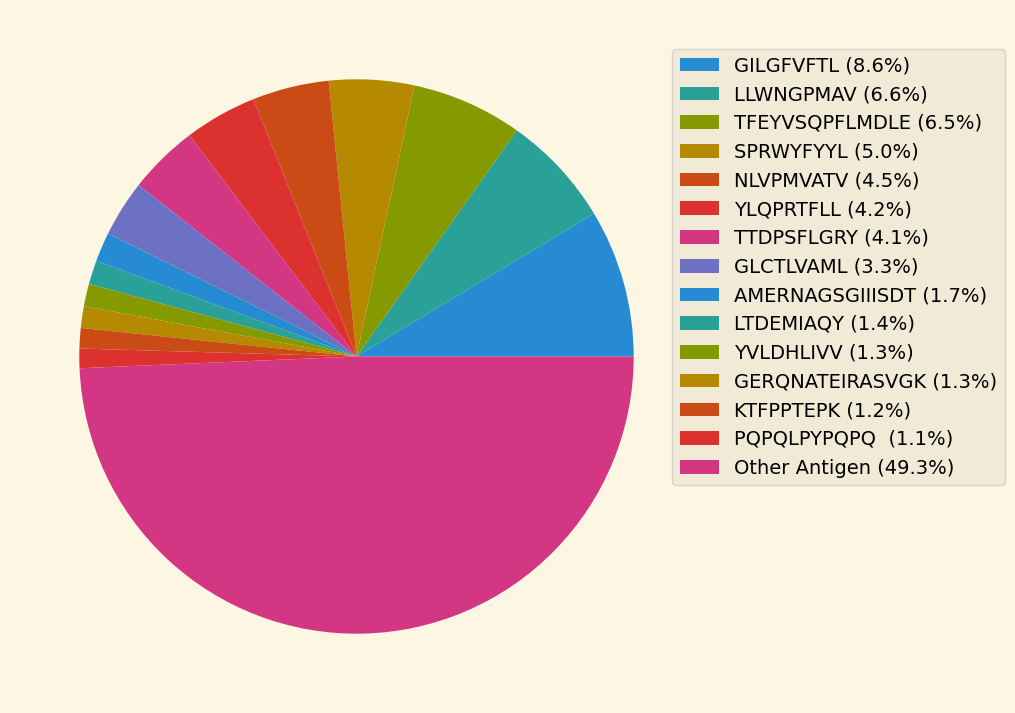

In [ ]:
unique_Antigen = combined_sequences['Antigen'].unique()
unique_CDR3B = combined_sequences['CDR3B'].unique()
unique_CDR3A = combined_sequences['CDR3A'].unique()
unique_tcrs = combined_sequences['CDR3B'].unique()
unique_MHC = combined_sequences['MHC'].unique()
Antigen_distribution = combined_sequences['Antigen'].value_counts()
CDR3B_distribution = combined_sequences['CDR3B'].value_counts()
CDR3A_distribution = combined_sequences['CDR3A'].value_counts()
MHC_distribution=combined_sequences['MHC'].value_counts()
#save_distribution(Antigen_distribution, 'Antigen_distribution.csv')
#save_distribution(CDR3A_distribution, 'CDR3A_distribution.csv')
#save_distribution(CDR3B_distribution, 'CDR3B_distribution.csv')
#save_distribution(MHC_distribution, '_distribution.csv')

# Draw Pie chart of Antigen distribution
major_Antigen_distribution = Antigen_distribution[Antigen_distribution>100]
other_Antigen_distribution = Antigen_distribution[Antigen_distribution<100]
added_entry = pd.Series([other_Antigen_distribution.sum()], index=['Other Antigen'])
major_Antigen_distribution = major_Antigen_distribution.append(added_entry)
pcts = [i / major_Antigen_distribution.sum() for i in major_Antigen_distribution]
pctlabels = [f'{i} ({j* 100:0.1f}%)' for i, j in zip(major_Antigen_distribution.index, pcts)]
plt.style.use('Solarize_Light2')
fig = major_Antigen_distribution.plot.pie(figsize=(9, 9), labels=None, ylabel="", labeldistance=1.05, rotatelabels=0, legend=True)
plt.legend(pctlabels, bbox_to_anchor=(1.45,0.30), loc='lower right', prop={'size': 14})
fig.set_facecolor(color='white')


<ipython-input-21-ca4385a74181>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  major_Antigen_distribution = major_Antigen_distribution.append(added_entry)


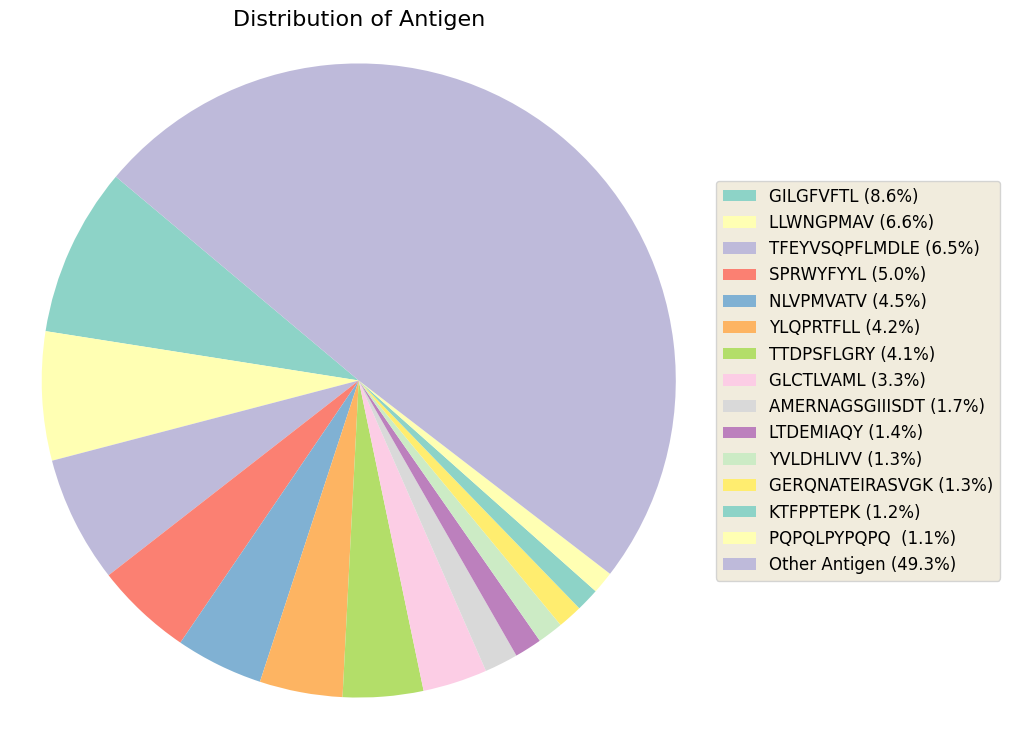

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming your DataFrame has a column named 'Antigen.Source'
# Replace 'Antigen.Source' with the actual column name if it's different
antigen_counts = combined_sequences['Antigen'].value_counts()

# Filter antigen sources with counts greater than 100 and group the rest as 'Other Antigen'
major_Antigen_distribution = antigen_counts[antigen_counts > 100]
other_Antigen_distribution = antigen_counts[antigen_counts <= 100]
added_entry = pd.Series([other_Antigen_distribution.sum()], index=['Other Antigen'])
major_Antigen_distribution = major_Antigen_distribution.append(added_entry)

# Calculate percentages for the pie chart
total_major = major_Antigen_distribution.sum()
pcts = [i / total_major for i in major_Antigen_distribution]

# Generate labels with percentages for the pie chart
pctlabels = [f'{i} ({j*100:0.1f}%)' for i, j in zip(major_Antigen_distribution.index, pcts)]

# Get a more diverse set of colors
colors = cm.Set3.colors

# Create the pie chart
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    major_Antigen_distribution,
    labels=None,
    startangle=140,
    autopct='',   # Remove the percentage labels within the pie chart
    labeldistance=1.05,
    colors=colors,
)

# Set the title and remove the default ylabel
ax.set_title('Distribution of Antigen')
ax.set_ylabel('')

# Set the background color of the pie chart
fig.set_facecolor(color='white')

# Add a legend to the right of the graph with smaller text size for pctlabels
ax.legend(wedges, pctlabels, bbox_to_anchor=(1, 0.5), loc='center left', prop={'size': 12})

# Equal aspect ratio ensures that the pie chart is circular.
ax.axis('equal')

# Show the pie chart
plt.show()

<ipython-input-22-7f7aba6e834a>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  major_Antigen_distribution = major_Antigen_distribution.append(added_entry)


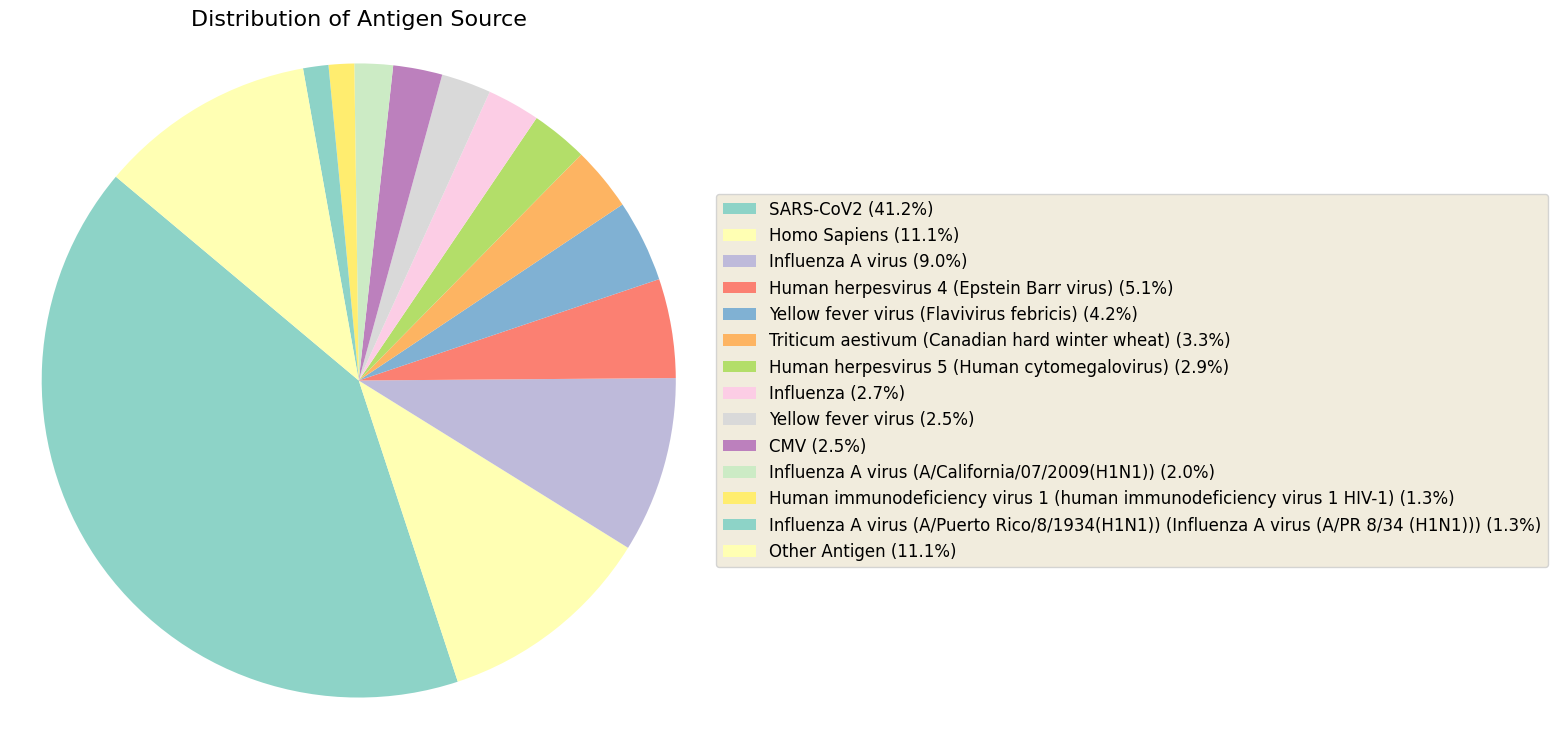

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming your DataFrame has a column named 'Antigen.Source'
# Replace 'Antigen.Source' with the actual column name if it's different
antigen_source_counts = combined_sequences['Antigen.Source'].value_counts()

# Filter antigen sources with counts greater than 100 and group the rest as 'Other Antigen'
major_Antigen_distribution = antigen_source_counts[antigen_source_counts > 100]
other_Antigen_distribution = antigen_source_counts[antigen_source_counts <= 100]
added_entry = pd.Series([other_Antigen_distribution.sum()], index=['Other Antigen'])
major_Antigen_distribution = major_Antigen_distribution.append(added_entry)

# Calculate percentages for the pie chart
total_major = major_Antigen_distribution.sum()
pcts = [i / total_major for i in major_Antigen_distribution]

# Generate labels with percentages for the pie chart
pctlabels = [f'{i} ({j*100:0.1f}%)' for i, j in zip(major_Antigen_distribution.index, pcts)]

# Get a more diverse set of colors
colors = cm.Set3.colors

# Create the pie chart
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    major_Antigen_distribution,
    labels=None,
    startangle=140,
    autopct='',   # Remove the percentage labels within the pie chart
    labeldistance=1.05,
    colors=colors,
)

# Set the title and remove the default ylabel
ax.set_title('Distribution of Antigen Source')
ax.set_ylabel('')

# Set the background color of the pie chart
fig.set_facecolor(color='white')

# Add a legend to the right of the graph with smaller text size for pctlabels
ax.legend(wedges, pctlabels, bbox_to_anchor=(1, 0.5), loc='center left', prop={'size': 12})

# Equal aspect ratio ensures that the pie chart is circular.
ax.axis('equal')

# Show the pie chart
plt.show()

<ipython-input-23-a599e9a9c196>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  major_MHC_distribution = major_MHC_distribution.append(added_entry)


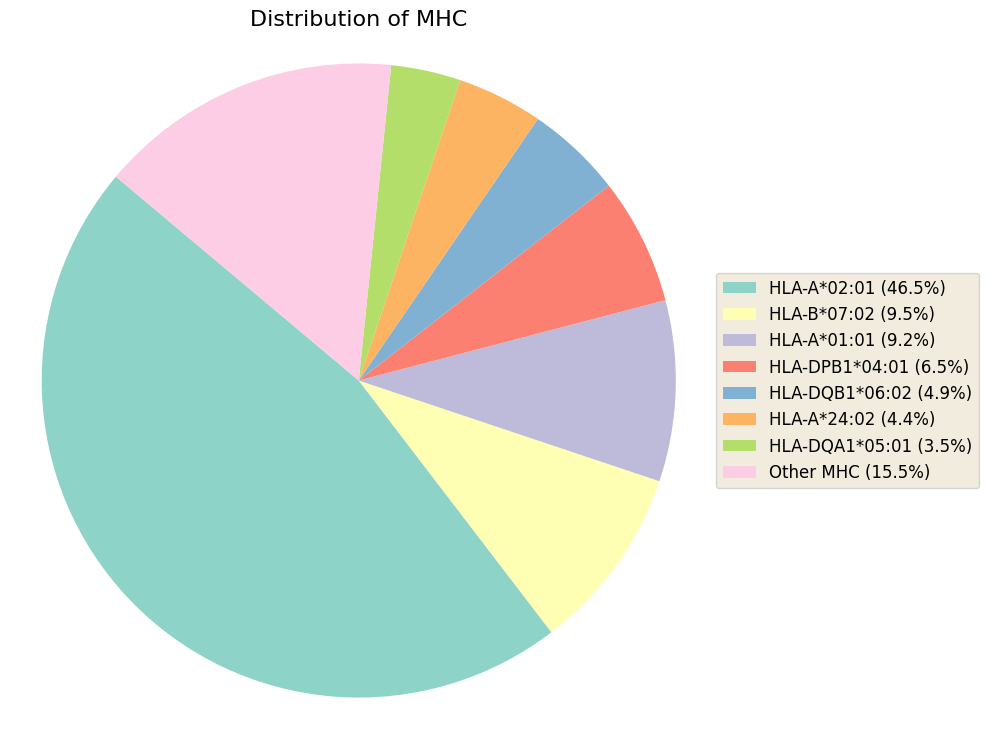

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming your DataFrame has a column named 'MHC'
# Replace 'Antigen.Source' with the actual column name if it's different
MHC_source_counts = combined_sequences['MHC'].value_counts()

# Filter MHC sources with counts greater than 100 and group the rest as 'Other MHC'
major_MHC_distribution = MHC_source_counts[MHC_source_counts > 200]
other_MHC_distribution = MHC_source_counts[MHC_source_counts <= 200]
added_entry = pd.Series([other_MHC_distribution.sum()], index=['Other MHC'])
major_MHC_distribution = major_MHC_distribution.append(added_entry)

# Calculate percentages for the pie chart
total_major = major_MHC_distribution.sum()
pcts = [i / total_major for i in major_MHC_distribution]

# Generate labels with percentages for the pie chart
pctlabels = [f'{i} ({j*100:0.1f}%)' for i, j in zip(major_MHC_distribution.index, pcts)]

# Get a more diverse set of colors
colors = cm.Set3.colors

# Create the pie chart
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    major_MHC_distribution,
    labels=None,
    startangle=140,
    autopct='',   # Remove the percentage labels within the pie chart
    labeldistance=1.05,
    colors=colors,
)

# Set the title and remove the default ylabel
ax.set_title('Distribution of MHC')
ax.set_ylabel('')

# Set the background color of the pie chart
fig.set_facecolor(color='white')

# Add a legend to the right of the graph with smaller text size for pctlabels
ax.legend(wedges, pctlabels, bbox_to_anchor=(1, 0.5), loc='center left', prop={'size': 12})

# Equal aspect ratio ensures that the pie chart is circular.
ax.axis('equal')

# Show the pie chart
plt.show()

<ipython-input-24-426684c76268>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  major_TRAV_distribution = major_TRAV_distribution.append(added_entry)


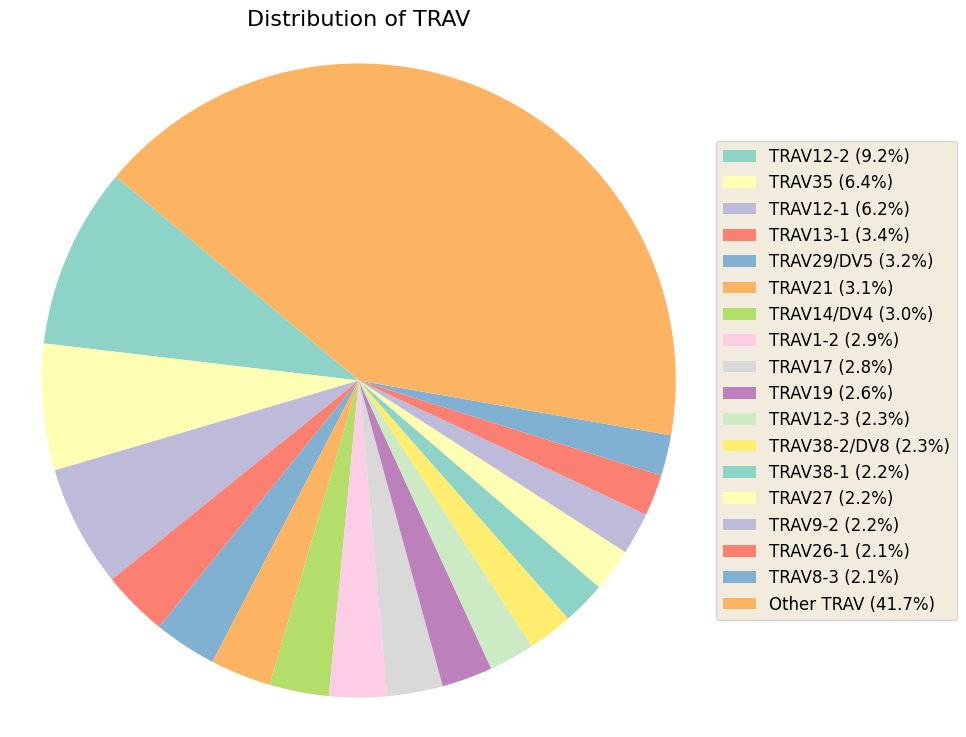

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming your DataFrame has a column named 'TRAV'
# Replace 'Antigen.Source' with the actual column name if it's different
TRAV_counts = combined_sequences['TRAV'].value_counts()

# Filter antigen sources with counts greater than 100 and group the rest as 'Other TRAV'
major_TRAV_distribution = TRAV_counts[TRAV_counts > 200]
other_TRAV_distribution = TRAV_counts[TRAV_counts <= 200]
added_entry = pd.Series([other_TRAV_distribution.sum()], index=['Other TRAV'])
major_TRAV_distribution = major_TRAV_distribution.append(added_entry)

# Calculate percentages for the pie chart
total_major = major_TRAV_distribution.sum()
pcts = [i / total_major for i in major_TRAV_distribution]

# Generate labels with percentages for the pie chart
pctlabels = [f'{i} ({j*100:0.1f}%)' for i, j in zip(major_TRAV_distribution.index, pcts)]

# Get a more diverse set of colors
colors = cm.Set3.colors

# Create the pie chart
fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    major_TRAV_distribution,
    labels=None,
    startangle=140,
    autopct='',   # Remove the percentage labels within the pie chart
    labeldistance=1.05,
    colors=colors,
)

# Set the title and remove the default ylabel
ax.set_title('Distribution of TRAV')
ax.set_ylabel('')

# Set the background color of the pie chart
fig.set_facecolor(color='white')

# Add a legend to the right of the graph with smaller text size for pctlabels
ax.legend(wedges, pctlabels, bbox_to_anchor=(1, 0.5), loc='center left', prop={'size': 12})

# Equal aspect ratio ensures that the pie chart is circular.
ax.axis('equal')

# Show the pie chart
plt.show()

#Sequence Length

Mean Antigen Length: 10.168643630737494
Mean Unique Antigen Length: 10.102459016393443


<Axes: title={'center': 'Unique Antigen per Antigen Length'}, xlabel='Antigen Length'>

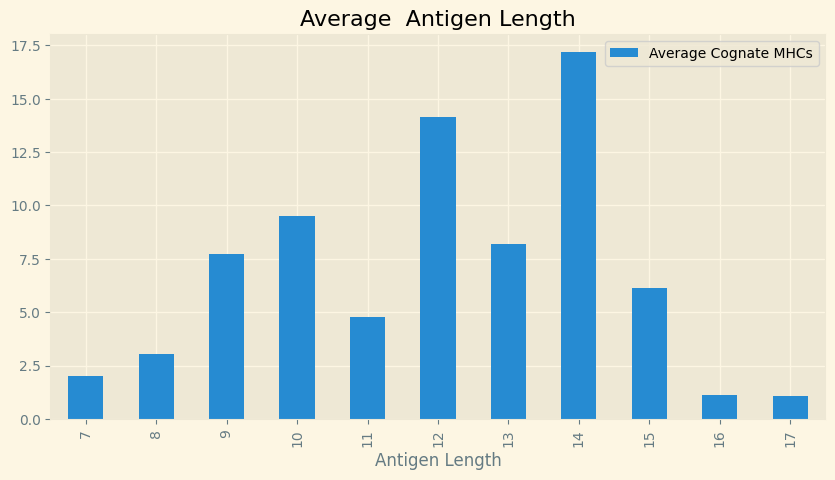

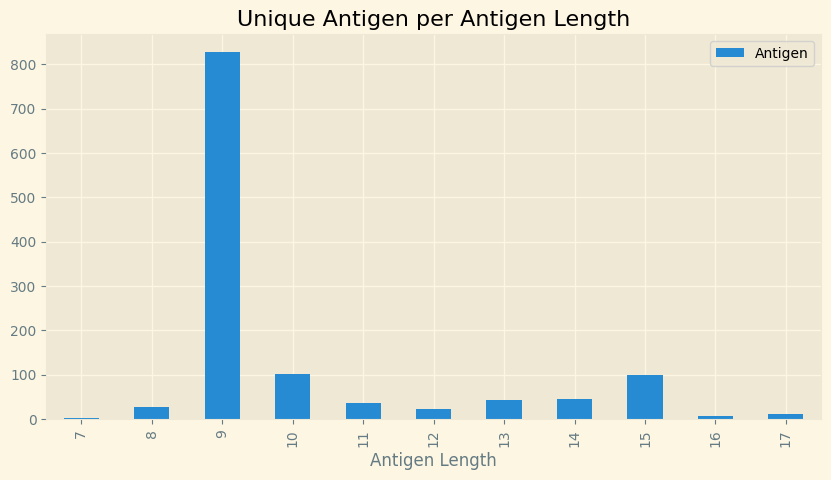

In [ ]:
Antigen_lengths = combined_sequences[['Antigen', 'MHC']].copy()
Antigen_lengths['Antigen Length'] = Antigen_lengths['Antigen'].str.len()
print("Mean Antigen Length:", Antigen_lengths['Antigen Length'].mean())
print("Mean Unique Antigen Length:", Antigen_lengths.drop_duplicates(subset=['Antigen'])['Antigen Length'].mean())
Antigen_length_counts = Antigen_lengths[['Antigen Length', 'Antigen']].drop_duplicates(subset=['Antigen']).groupby(['Antigen Length']).count()
Antigen_lengths = Antigen_lengths.groupby(['Antigen', 'Antigen Length']).count()
Antigen_lengths = Antigen_lengths.groupby(['Antigen Length']).mean()
Antigen_lengths.rename(columns = {"MHC": "Average Cognate MHCs"}, inplace = True)
Antigen_lengths.plot.bar(figsize=(10, 5), title='Average  Antigen Length')
Antigen_length_counts.rename(columns = {"Antigen": "Antigen"}, inplace = True)
Antigen_length_counts.plot.bar(figsize=(10, 5), title='Unique Antigen per Antigen Length')

Mean CDR3A Length: 13.242083548220732
Mean Unique CDR3A Length: 13.235791314485573


<ipython-input-26-4000580e577f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CDR3A_lengths = CDR3A_lengths.groupby(['CDR3A Length']).mean()


<Axes: title={'center': 'Unique CDR3A per CDR3A Length'}, xlabel='CDR3A Length'>

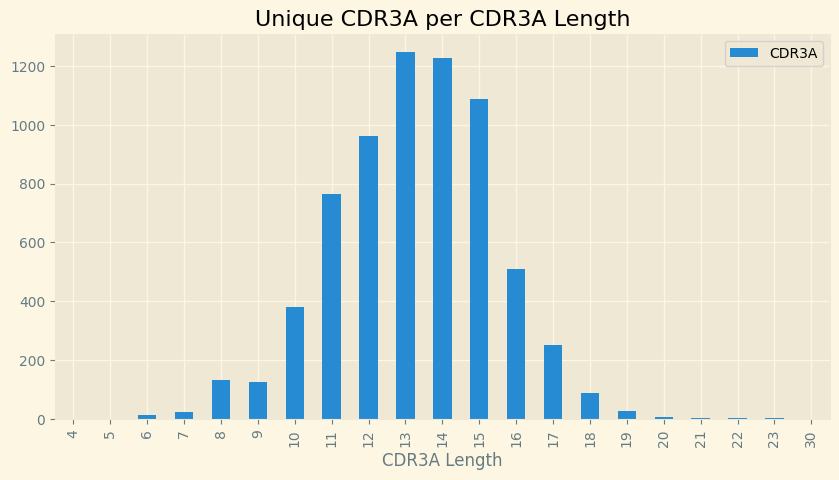

In [ ]:
CDR3A_lengths = combined_sequences[["CDR3A"]].copy()
CDR3A_lengths['CDR3A Length'] = CDR3A_lengths['CDR3A'].str.len()
print("Mean CDR3A Length:", CDR3A_lengths['CDR3A Length'].mean())
print("Mean Unique CDR3A Length:", CDR3A_lengths.drop_duplicates(subset=['CDR3A'])['CDR3A Length'].mean())
CDR3A_length_counts = CDR3A_lengths[['CDR3A Length', 'CDR3A']].drop_duplicates(subset=['CDR3A']).groupby(['CDR3A Length']).count()
CDR3A_lengths = CDR3A_lengths.groupby(['CDR3A Length']).mean()
CDR3A_length_counts.rename(columns = {"CDR3A": "CDR3A"}, inplace = True)
CDR3A_length_counts.plot.bar(figsize=(10, 5), title='Unique CDR3A per CDR3A Length')

Mean CDR3B Length: 14.027849406910779
Mean Unique CDR3B Length: 14.145737251284753


<ipython-input-27-01a2926eb8a0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CDR3B_lengths = CDR3B_lengths.groupby(['CDR3B Length']).mean()


<Axes: title={'center': 'Unique CDR3B per CDR3B Length'}, xlabel='CDR3B Length'>

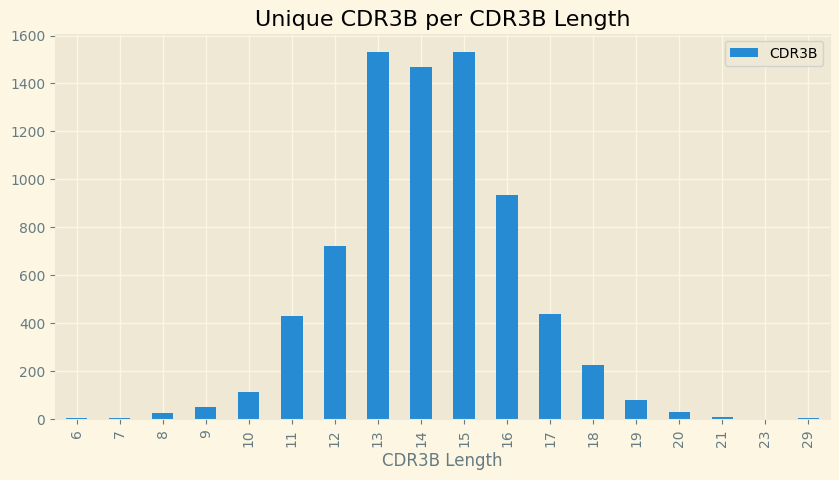

In [ ]:
CDR3B_lengths = combined_sequences[["CDR3B"]].copy()
CDR3B_lengths['CDR3B Length'] = CDR3B_lengths['CDR3B'].str.len()
print("Mean CDR3B Length:", CDR3B_lengths['CDR3B Length'].mean())
print("Mean Unique CDR3B Length:", CDR3B_lengths.drop_duplicates(subset=['CDR3B'])['CDR3B Length'].mean())
CDR3B_length_counts = CDR3B_lengths[['CDR3B Length', 'CDR3B']].drop_duplicates(subset=['CDR3B']).groupby(['CDR3B Length']).count()
CDR3B_lengths = CDR3B_lengths.groupby(['CDR3B Length']).mean()
CDR3B_length_counts.rename(columns = {"CDR3B": "CDR3B"}, inplace = True)
CDR3B_length_counts.plot.bar(figsize=(10, 5), title='Unique CDR3B per CDR3B Length')

In [ ]:
# Save metadata file
combined_sequences.to_csv('combined_metadata.csv', index=False)
# Get Relevant Columns for training
final_data = combined_sequences[['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', 'MHC',"HLA.aa", 'Antigen', 'Affinity']]
# Save to File
final_data.to_csv('combined_dataset_positive_only.csv', index=False, header=True)


#Negative Data Generation

to generate a negative dataset I randomly selecting one entry from each column of your positive dataset, effectively creating new pairings for 'CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', and 'MHC', 'HLA.aa'  'Antigen'

In [ ]:
import pandas as pd
import random

# Load your positive dataset (assuming it's named 'positive_dataset.csv')
positive_data = pd.read_csv('combined_dataset_positive_only.csv')

# List of columns to select one entry randomly
columns_to_select = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ','MHC', 'HLA.aa', 'Antigen']

# Create an empty DataFrame for the negative dataset
negative_data = pd.DataFrame(columns=columns_to_select)

# Number of rows to generate
num_rows = 9695  # Adjust this to your desired number of rows

# Repeat the process for the specified number of rows
for _ in range(num_rows):
    row_entry = {}
    for col in columns_to_select:
        random_entry = positive_data[col].sample(n=1).values[0]
        row_entry[col] = [random_entry]
    row_entry['Affinity'] = [0]

    # Append the row entry to the negative dataset
    negative_data = negative_data.append(pd.DataFrame(row_entry), ignore_index=True)

# Save the negative dataset to a CSV file (e.g., 'negative_dataset.csv')
negative_data.to_csv('negative_dataset.csv', index=False)



In [ ]:
negative_dataset = pd.read_csv('negative_dataset.csv', encoding='latin', low_memory=False)
negative_dataset

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC,HLA.aa,Antigen,Affinity
0,CASGVYSSASKIIF,TRAV16,TRAJ24-1,CASSPTSGSIYEQFF,TRBV19,TRBJ1-2,HLA-DRB1*07:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,FEDLRVLSF,0.0
1,CAMREGGNFQKLVF,TRAV10,TRAJ23-1,CASSSMTSGIRYEQYF,TRBV6-1,TRBJ1-5,HLA-A*02:01,GSHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GILGFVFTL,0.0
2,CAVREGADGLTF,TRAV29/DV5,TRAJ52,ASSPVTGGIYGYT,TRBV4-2,TRBJ1-2,HLA-B*07:02,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GILGFVFTL,0.0
3,CAVGEVNDMRF,TRAV12-2,TRAJ42,CASSLLGEDVEQFF,TRBV15,TRBJ2-7,HLA-A*02:01,GSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRMA...,KLWAQCVQL,0.0
4,CAVLDSNYQLIW,TRAV35,TRAJ42,SASRTSGRAGDEQF,TRBV7-6,TRBJ2-1,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,SLFFSAQPFEITAST,0.0
...,...,...,...,...,...,...,...,...,...,...
9690,CAMSALGNFGNEKLTF,TRAV1-2,TRAJ42,CASSRGGAPYNEQFF,TRBV27,TRBJ1-2,HLA-DQB1*06:02,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,FEDLRVSSF,0.0
9691,CILRDIPFDRGSTLGRLYF,TRAV25,TRAJ11,CASSLGDSEKLFF,TRBV6-1,TRBJ2-7,HLA-B*40:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,NLVPMVATV,0.0
9692,CAGRNYGGSQGNLIF,TRAV1-2,TRAJ20,ASSQGDTNYGYT,TRBV19,TRBJ2-1,HLA-DQA1*03:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GILGFVFTL,0.0
9693,CVVNNNNDMRF,TRAV19-1,TRAJ57,ASSFGQGTDTQY,TRBV6-5,TRBJ2-7,HLA-DQA1*05:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TTDPSFLGRY,0.0


In [ ]:

print(negative_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CDR3A     9695 non-null   object 
 1   TRAV      9695 non-null   object 
 2   TRAJ      9695 non-null   object 
 3   CDR3B     9695 non-null   object 
 4   TRBV      9695 non-null   object 
 5   TRBJ      9695 non-null   object 
 6   MHC       9695 non-null   object 
 7   HLA.aa    9695 non-null   object 
 8   Antigen   9695 non-null   object 
 9   Affinity  9695 non-null   float64
dtypes: float64(1), object(9)
memory usage: 757.5+ KB
None


In [ ]:
import pandas as pd
import random

# Set a random seed for reproducibility
random_seed = 42  # You can choose any integer value as the seed
random.seed(random_seed)

# List of valid amino acids (standard 20 amino acids)
valid_amino_acids = "ACDEFGHIKLMNPQRSTVWY"

# Function to generate a random peptide of length between 7 and 17
def generate_random_peptide():
    peptide_length = random.randint(7, 17)
    return ''.join(random.choices(valid_amino_acids, k=peptide_length))


# Create a new dataframe for the negative dataset
negative_data = negative_dataset.copy()

# Loop over the 'Antigen' column and generate random peptides for each entry
negative_data['Antigen'] = [generate_random_peptide() for _ in range(len(negative_data))]

# Set the 'Affinity' column to 0 for all entries
negative_data['Affinity'] = 0

# Save the negative dataset to a new CSV file
# Replace 'path_to_negative_data.csv' with the desired file path for the negative dataset
negative_data.to_csv('negative_data.csv', index=False)


In [ ]:
negative_data = pd.read_csv('negative_data.csv', encoding='latin', low_memory=False)
negative_data['Antigen']

0       DRFDDRMNACFPNRRKK
1             TATQHEYHCCT
2        GALDWCGPVIECQSYV
3                ILTEIQRQ
4                PEREIYPN
              ...        
9690         MFLKFPSVGYKR
9691       DTLQVQVKPKTQRN
9692    NCMKPPECYHYIRGQWP
9693            TCNKIIDHD
9694        METACKQNNAIQI
Name: Antigen, Length: 9695, dtype: object

In [ ]:
# Load your positive dataset (assuming it's named 'positive_dataset.csv')
negative_data = pd.read_csv('negative_data.csv')

#Check if each row in the negative dataset is unique
# List of columns to consider for uniqueness
columns_unique = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', 'MHC', 'HLA.aa','Antigen']

# Get the dataframe with unique rows based on the specified columns
unique_rows_neg = negative_dataset.drop_duplicates(subset=columns_unique)

# Get the number of unique rows
num_unique_rows = len(unique_rows_neg)

print("Number of unique rows in the dataframe:", num_unique_rows)

Number of unique rows in the dataframe: 9695


In [ ]:
negative_data

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC,HLA.aa,Antigen,Affinity
0,CASGVYSSASKIIF,TRAV16,TRAJ24-1,CASSPTSGSIYEQFF,TRBV19,TRBJ1-2,HLA-DRB1*07:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,DRFDDRMNACFPNRRKK,0
1,CAMREGGNFQKLVF,TRAV10,TRAJ23-1,CASSSMTSGIRYEQYF,TRBV6-1,TRBJ1-5,HLA-A*02:01,GSHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TATQHEYHCCT,0
2,CAVREGADGLTF,TRAV29/DV5,TRAJ52,ASSPVTGGIYGYT,TRBV4-2,TRBJ1-2,HLA-B*07:02,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GALDWCGPVIECQSYV,0
3,CAVGEVNDMRF,TRAV12-2,TRAJ42,CASSLLGEDVEQFF,TRBV15,TRBJ2-7,HLA-A*02:01,GSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRMA...,ILTEIQRQ,0
4,CAVLDSNYQLIW,TRAV35,TRAJ42,SASRTSGRAGDEQF,TRBV7-6,TRBJ2-1,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,PEREIYPN,0
...,...,...,...,...,...,...,...,...,...,...
9690,CAMSALGNFGNEKLTF,TRAV1-2,TRAJ42,CASSRGGAPYNEQFF,TRBV27,TRBJ1-2,HLA-DQB1*06:02,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,MFLKFPSVGYKR,0
9691,CILRDIPFDRGSTLGRLYF,TRAV25,TRAJ11,CASSLGDSEKLFF,TRBV6-1,TRBJ2-7,HLA-B*40:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,DTLQVQVKPKTQRN,0
9692,CAGRNYGGSQGNLIF,TRAV1-2,TRAJ20,ASSQGDTNYGYT,TRBV19,TRBJ2-1,HLA-DQA1*03:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,NCMKPPECYHYIRGQWP,0
9693,CVVNNNNDMRF,TRAV19-1,TRAJ57,ASSFGQGTDTQY,TRBV6-5,TRBJ2-7,HLA-DQA1*05:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TCNKIIDHD,0


#Combine positive and negative datasets together


In [ ]:
import pandas as pd

# Load and preprocess the positive and negative datasets
combined_positive = pd.read_csv('combined_dataset_positive_only.csv')  # Replace with your actual file path
combined_negative = pd.read_csv('negative_dataset.csv')  # Replace with your actual file path


# Concatenate the positive and negative datasets together
combined_positive_negative = pd.concat([combined_positive, combined_negative], ignore_index=True)

# Now you have a single DataFrame 'combined_positive_negative' containing both positive and negative samples
combined_positive_negative

# Save the negative dataset to a new CSV file
combined_positive_negative.to_csv('combined_positive_negative.csv', index=False)


In [ ]:
#check if each row in the combined negative_positive dataset is unique
# List of columns to consider for uniqueness
columns_to_check_unique = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', 'MHC', 'HLA.aa','Antigen']

# Get the dataframe with unique rows based on the specified columns
unique_rows_combined = combined_positive_negative.drop_duplicates(subset=columns_to_check_unique)

# Get the number of unique rows
num_unique_rows = len(unique_rows_neg)

print("Number of unique rows in the dataframe:", num_unique_rows)

Number of unique rows in the dataframe: 9695


In [ ]:
# Create a vocabulary of unique amino acids
amino_acids = set("".join(combined_positive_negative["CDR3A"]) + "".join(combined_positive_negative["CDR3B"]) + "".join(combined_positive_negative["HLA.aa"]) + "".join(combined_positive_negative["Antigen"]))
amino_acids

In [ ]:
columns_to_search = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ','HLA.aa', 'MHC', 'Antigen']

# Initialize an empty list to store matching indices
matching_indices = []

# Loop through the columns and search for 'r'
for col in columns_to_search:
    has_r = combined_positive_negative[col].str.contains('r', case=True)  # case=False for case-insensitive search
    matching_indices.extend(combined_positive_negative.index[has_r])

# Remove duplicate indices
matching_indices = list(set(matching_indices))

# Print the matching indices
print("Indices with 'r' in any of the specified columns:")
print(matching_indices)

#there are a few instances where the lower case r comes up.

Indices with 'r' in any of the specified columns:
[12577, 3901]


In [ ]:
columns_to_replace = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', 'Antigen']

# Loop through the columns and replace lowercase 'r' with uppercase 'R'
for col in columns_to_replace:
    combined_positive_negative[col] = combined_positive_negative[col].str.replace('r', 'R')

In [ ]:
columns_to_search = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ','HLA.aa', 'MHC', 'Antigen']

# Initialize an empty list to store matching indices
matching_indices = []

# Loop through the columns and search for 'l'
for col in columns_to_search:
    has_l =  combined_positive_negative[col].str.contains('l', case=True)  # case=False for case-insensitive search
    matching_indices.extend( combined_positive_negative.index[has_l])

# Remove duplicate indices
matching_indices = list(set(matching_indices))

# Print the matching indices
print("Indices with 'l' in any of the specified columns:")
print(matching_indices)

Indices with 'l' in any of the specified columns:
[13324, 11929, 12790, 9687, 9689, 14618, 9692, 9693, 9694]


In [ ]:
# List of columns to search for 'l'
columns_to_search = ['CDR3A', 'TRAV', 'TRAJ', 'CDR3B', 'TRBV', 'TRBJ', 'HLA.aa', 'MHC', 'Antigen']

# Initialize an empty list to store matching indices
matching_indices = []

# Loop through the columns and search for 'l'
for col in columns_to_search:
    has_l =combined_positive_negative[col].str.contains('l', case=True)  # case=False for case-insensitive search
    matching_indices.extend(combined_positive_negative.index[has_l])

# Remove duplicate indices
matching_indices = list(set(matching_indices))

# Remove the rows with matching indices
filtered_data = combined_positive_negative.drop(matching_indices)

# Print the filtered DataFrame
print(filtered_data)

In [ ]:
filtered_data

,CDR3A,TRAV,TRAJ,CDR3B,TRBV,TRBJ,MHC,HLA.aa,Antigen,Affinity
0,CAVTKGLTGGGNKLTF,TRAV8-4,TRAJ10,CASSGRDRQNTEAFF,TRBV19,TRBJ1-1,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,1.0
1,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-1,TRBJ1-2,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,1.0
2,CAVSGYSTLTF,TRAV12-2,TRAJ11,CASSAQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,1.0
3,CAVTGYSTLTF,TRAV12-2,TRAJ11,CASSGQGAYGYTF,TRBV6-5,TRBJ1-2,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,1.0
4,CAGGDSTLTF,TRAV12-2,TRAJ11,CASSQEGTSRPQHF,TRBV3-1,TRBJ1-5,HLA-A*02:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,LLWNGPMAV,1.0
...,...,...,...,...,...,...,...,...,...,...
19385,CAMSALGNFGNEKLTF,TRAV1-2,TRAJ42,CASSRGGAPYNEQFF,TRBV27,TRBJ1-2,HLA-DQB1*06:02,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,FEDLRVSSF,0.0
19386,CILRDIPFDRGSTLGRLYF,TRAV25,TRAJ11,CASSLGDSEKLFF,TRBV6-1,TRBJ2-7,HLA-B*40:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,NLVPMVATV,0.0
19387,CAGRNYGGSQGNLIF,TRAV1-2,TRAJ20,ASSQGDTNYGYT,TRBV19,TRBJ2-1,HLA-DQA1*03:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GILGFVFTL,0.0
19388,CVVNNNNDMRF,TRAV19-1,TRAJ57,ASSFGQGTDTQY,TRBV6-5,TRBJ2-7,HLA-DQA1*05:01,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TTDPSFLGRY,0.0


In [ ]:

# Save the negative dataset to a new CSV file
filtered_data.to_csv('combined_positive_negative.csv', index=False)

#Amino acid properties table Not needed

In [ ]:
#amino_acids = pd.read_csv('Amino acid properties.csv', encoding='latin', low_memory=False)
#amino_acids

In [ ]:
# To see the names of the columns, simply use the 'columns' attribute
#column_names = amino_acids.columns

# Print the column names
#print(column_names)

In [ ]:
#amino_acids= amino_acids.drop(columns=['Amino Acid ', 'Hydropathy'])

#amino_acids

In [ ]:
#import seaborn as sns
# Calculate Spearman's correlation matrix
#corr_matrix = amino_acids.corr(method='spearman')

# Display the correlation matrix
#print(corr_matrix)

In [ ]:
#lets visualize the correlation matrix using seaborn
#sns.heatmap(amino_acids.corr(),cmap='coolwarm')